In [1]:
import pandas as pd
import numpy as np

In [2]:
dfx=pd.read_csv('Xenergy.csv',header=0, index_col=0, parse_dates=True, squeeze=True)
dfx=dfx.drop('Year',axis=1)

In [3]:
dfx.head()

,Total Energy
0,40552
1,42689
2,44327
3,47020
4,50209


In [5]:
n_data_points = len(dfx)

# Convert data to a numpy array
arr = np.array(dfx).reshape(n_data_points)
print(arr.shape)

(55,)


In [6]:
X = 5
Y = 5
window = X + Y  #10

dataset = np.empty((45,window))  

for i in range(45):
    dataset[i] = arr[i:i+window]
    
print(dataset.shape)

(45, 10)


In [8]:
np.random.shuffle(dataset)

In [10]:
n_training_points = 34

X_train, y_train = dataset[:n_training_points,:X], dataset[:n_training_points,X:]

In [12]:
# Test Data

n_test_points = 10

X_test = dataset[1+n_training_points : n_training_points+1+n_test_points,:X]
y_test = dataset[1+n_training_points : n_training_points+1+n_test_points,X:]

In [13]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(34, 5)
(34, 5)
(10, 5)
(10, 5)


In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam, SGD

In [19]:
from sklearn import metrics
from scipy import stats

In [15]:
# Initialize the model 
model = Sequential()

# Add first hidden layer 
model.add(Dense(32, activation='relu', input_shape=(X,)))

# Add second hidden layer
model.add(Dense(32, activation='relu'))
 
# Add an output layer 
model.add(Dense(Y))

In [16]:
optimizer = Adam(lr=0.003)
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])

C:\Users\Srivathsav\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [17]:
epochs = 50
batch_size = 64

history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 7840651264.0000 - mae: 82146.3828 - val_loss: 5832739328.0000 - val_mae: 70180.1641
Epoch 2/50
1/1 [==============================] - 0s 60ms/step - loss: 7153484800.0000 - mae: 78407.5938 - val_loss: 5303962112.0000 - val_mae: 66802.8984
Epoch 3/50
1/1 [==============================] - 0s 57ms/step - loss: 6519969792.0000 - mae: 74726.8438 - val_loss: 4824367616.0000 - val_mae: 63502.9180
Epoch 4/50
1/1 [==============================] - 0s 59ms/step - loss: 5944466944.0000 - mae: 71108.4531 - val_loss: 4402364416.0000 - val_mae: 60350.7617
Epoch 5/50
1/1 [==============================] - 0s 50ms/step - loss: 5434497024.0000 - mae: 67650.9609 - val_loss: 4033126656.0000 - val_mae: 57410.0352
Epoch 6/50
1/1 [==============================] - 0s 52ms/step - loss: 4990742016.0000 - mae: 64452.8594 - val_loss: 3712160512.0000 - val_mae: 54655.4336
Epoch 7/50
1/1 [==============================] - 0s 54ms/step - loss: 4

In [20]:
dnn_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test)

print(f'MSE: {score[0]}')
print(f'MAE: {score[1]}')
print('R2: ', metrics.r2_score(y_test, dnn_pred, sample_weight=None, multioutput='uniform_average'))

1/1 [==============================] - 0s 45ms/step - loss: 45469820.0000 - mae: 5459.2988
MSE: 45469820.0
MAE: 5459.298828125
R2:  0.9152981864088267


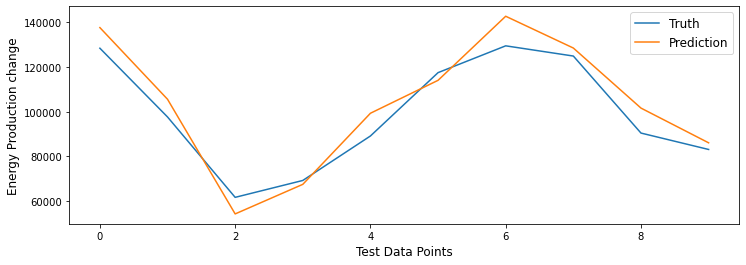

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(y_test[:,4], label='Truth')
plt.plot(dnn_pred[:,4], label='Prediction')
plt.ylabel('Energy Production change', fontsize=12)
plt.xlabel('Test Data Points', fontsize=12)
plt.legend(fontsize=12)
plt.show()